M1 Target = 2.95e-08 T·s²/m
M1 Initial = -4.55e-09 T·s²/m
VENC Initial = -1.62e+03 cm/s
2.9519310815971747e-08
2.951931081597175e-08
2.4999999999999996


Text(0, 0.5, 'Slewrate  [T/m/s]')

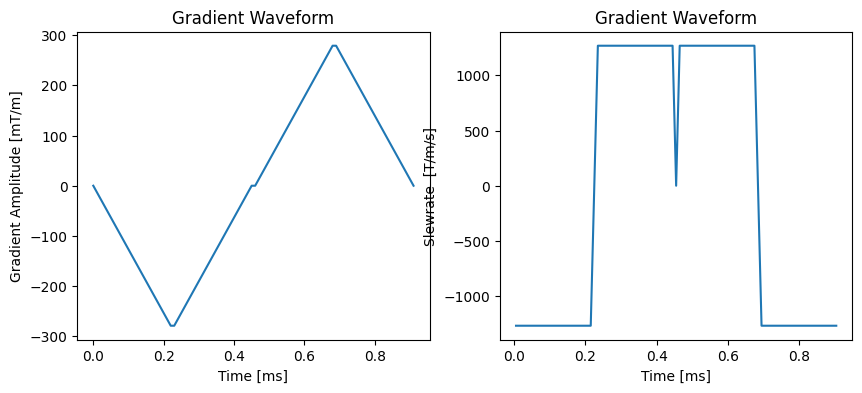

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# MRI system specs
sys = {}  # Initialize an empty dictionary
sys['dt'] = 10e-6        # Gradient raster time [s]
sys['gmax'] = 45e-3      # Maximum gradient amplitude [T/m]
sys['smax'] = 200        # Maximum slewrate [T/m/s]
sys['gamma'] = 42.57e6   # Gyromagnetic ratio [Hz/T]

# Define the VENC for the simulation
venc = 250  # VENC in [cm/s]
venc_mps = venc / 100.0  # Convert to [m/s]

# First moment target - Example, M1 ≈ 4.94e-09 T·s²/m for VENC = 150 cm/s
M1_target = np.pi / (sys['gamma'] * venc_mps)  # [T·s²/m]
print(f"M1 Target = {M1_target:.2e} T·s²/m")

# Design g_ramp time and samples
ramp_time = sys['gmax'] / sys['smax']  # Minimum ramp time to sys['gmax'] in [s]
ramp_samples = int(np.ceil(ramp_time / sys['dt']))  # Max number of samples on ramp [#]
t_ramp = np.linspace(0, ramp_time, ramp_samples, endpoint=False)  # Times that accord with ramp steps [s]
g_ramp = (sys['smax'] * t_ramp)  # Linear gradient ramp, g_ramp: g [T/m] = S_max [T/m/s] * t [s]

# Initial g_lobe with g_ramp up and g_ramp down
g_lobe = np.concatenate((g_ramp, g_ramp[::-1]))  # [T/m]

# Bipolar waveform: positive g_lobe then negative g_lobe
g_bipolar = np.concatenate((g_lobe, -g_lobe))

# Time vector for current g_bipolar
time = np.arange(len(g_bipolar)) * sys['dt']  # [s]

# Check the M1 and VENC
M1 = np.sum(g_bipolar * time) * sys['dt']     # [T•s^2/m]
venc_mps = np.pi / (sys['gamma'] * M1)
print(f"M1 Initial = {M1:.2e} T·s²/m")
print(f"VENC Initial = {100*venc_mps:.2f} cm/s")

# Scale waveform to match exact target M1
scale = M1_target / M1
g_bipolar *= scale

M1 = np.sum(g_bipolar * time) * sys['dt']     # [T•s^2/m]
venc_mps = np.pi / (sys['gamma'] * M1)

print(M1_target)
print(M1)
print(venc_mps)

# Slew rate
slew_rate = np.diff(g_bipolar) / sys['dt']  # [T/m/s]
t_slew = time[:-1] + sys['dt']/2       # Center point align with the gradient waveform

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].plot(1000*time, 1000*g_bipolar)  # Plot in [ms] and [mT/m]
axes[0].set_title('Gradient Waveform')
axes[0].set_xlabel('Time [ms]')
axes[0].set_ylabel('Gradient Amplitude [mT/m]')

axes[1].plot(1000*t_slew, slew_rate)   # Plot in [ms] and [mT/m]
axes[1].set_title('Gradient Waveform')
axes[1].set_xlabel('Time [ms]')
axes[1].set_ylabel('Slewrate  [T/m/s]')
